In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Cria objeto com o caminho da pasta do Projeto
from pathlib import Path
#pasta_projeto = Path('/content/drive/MyDrive/AGU_Notebooks/Labs R2D2/')
pasta_projeto = Path(Path.cwd())

import nltk
from sklearn.model_selection import train_test_split


from nltk.stem import RSLPStemmer


In [28]:
dados = pd.read_parquet(pasta_projeto /'dados_desbalanceados.parquet')

In [29]:
print(dados.shape)
dados['coordenacao'].value_counts()

(33111, 6)


coordenacao
COREJEF     13221
CORESP      11999
CORESE       3759
CORESA       1951
COREM        1111
COREPAM       613
CORAT         367
CORETRAB       55
COREPRO        35
Name: count, dtype: int64

In [30]:
dados

,cnj,orgao,classe,tipo,coordenacao,peticao_processada
index,,,,,,
0,10437601020204013300,2ª RELATORIA DA 3ª TURMA RECURSAL DA SJBA,RECURSO INOMINADO CÍVEL,INDENIZAÇÃO POR DANO AMBIENTAL,COREJEF,vara juizados especiais federais secao judicia...
1,10028658120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
2,10028363120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
3,10028622920234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
4,10030355320234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
...,...,...,...,...,...,...
35645,10619787220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,inicial anexa
35647,10599157420234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,1 4 vara secao judiciaria distrito distribuica...
35648,10638251220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,vara subsecao judiciaria distrito ref cumprime...


In [31]:
# define variaveis independentes e variável dependente(TARGET)
X = dados[['tipo','classe','orgao']]
y = dados['coordenacao']

In [32]:
# Transformação das variáveis independentes categórica para numérica

X_dum = pd.get_dummies(X[['tipo','classe','orgao']])
X_dum.shape


(33111, 1242)

In [33]:
X_dum = X_dum.astype(int)

In [34]:
X_dum

,tipo_1/3 DE FÉRIAS,tipo_ABATIMENTO PROPORCIONAL DO PREÇO,tipo_ABONO DA LEI 8.178/91,tipo_ABONO DE PERMANÊNCIA,tipo_ABONO DE PERMANÊNCIA EM SERVIÇO (ART. 87),tipo_ABONO PECUNIÁRIO (ART. 78 LEI 8.112/1990),tipo_ACESSIBILIDADE,tipo_ACESSO SEM CONCLUSÃO DO ENSINO MÉDIO,tipo_ACESSÃO,tipo_ACIDENTE DE TRABALHO,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dados.dtypes

cnj                   object
orgao                 object
classe                object
tipo                  object
coordenacao           object
peticao_processada    object
dtype: object

In [36]:
# Separação dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, stratify=y, test_size=0.20, random_state=42)

In [37]:
X_train

,tipo_1/3 DE FÉRIAS,tipo_ABATIMENTO PROPORCIONAL DO PREÇO,tipo_ABONO DA LEI 8.178/91,tipo_ABONO DE PERMANÊNCIA,tipo_ABONO DE PERMANÊNCIA EM SERVIÇO (ART. 87),tipo_ABONO PECUNIÁRIO (ART. 78 LEI 8.112/1990),tipo_ACESSIBILIDADE,tipo_ACESSO SEM CONCLUSÃO DO ENSINO MÉDIO,tipo_ACESSÃO,tipo_ACIDENTE DE TRABALHO,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
13054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import LabelEncoder

# Cria uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Converte as classes de treinamento para números inteiros
y_train_encoded = label_encoder.fit_transform(y_train)

In [39]:
############################## a partir daqui um novo notebook.... preciso entender cmo salvar (X_train, y_train) e (X_test, y_test)

In [40]:
!pip install --upgrade pandas xgboost

In [41]:
# importação das bibliotecas necessárias para treino e teste do modelo e métricas
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

In [42]:

# importa o modelo Naive Bayes
model_naive_bayes = GaussianNB()

# treina o modelo Naive Bayes
model_naive_bayes.fit(X_train, y_train_encoded)

# codifica os rótulos do conjunto de teste (se ainda não estiverem codificados)
y_test_encoded = label_encoder.transform(y_test)

# Avalia o modelo com model score
accuracymodelscore = model_naive_bayes.score(X_test, y_test_encoded)
print(f"Acurácia do modelo .score: {accuracymodelscore}")

# realiza previsões no conjunto de teste
y_pred_test = model_naive_bayes.predict(X_test)

# Avalia o modelo Naive Bayes
accuracy = accuracy_score(y_test_encoded, y_pred_test)
print(f"Acurácia do modelo Naive Bayes: {accuracy}")

Acurácia do modelo .score: 0.595651517439227
Acurácia do modelo Naive Bayes: 0.595651517439227


In [43]:
#importou a biblioteca para medir a acurácia balanceada
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test_encoded, model_naive_bayes.predict(X_test)))

0.7388653654482571


In [44]:
# importa a biblioteca para visualização das métricas
# importa a biblioteca para visualização das métricas
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, model_naive_bayes.predict(X_test)))



              precision    recall  f1-score   support

           0       0.09      0.93      0.17        73
           1       0.99      0.45      0.62      2645
           2       0.36      0.85      0.50       222
           3       0.63      0.90      0.74       123
           4       1.00      0.43      0.60         7
           5       0.20      0.91      0.32       390
           6       0.92      0.88      0.90       752
           7       0.98      0.56      0.72      2400
           8       0.23      0.73      0.35        11

    accuracy                           0.60      6623
   macro avg       0.60      0.74      0.55      6623
weighted avg       0.89      0.60      0.66      6623



In [45]:
# Converte os resultados preditos de volta para os nomes originais
y_pred_encoded = model_naive_bayes.predict(X_test)
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Imprime o relatório de classificação
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

       CORAT       0.09      0.93      0.17        73
     COREJEF       0.99      0.45      0.62      2645
       COREM       0.36      0.85      0.50       222
     COREPAM       0.63      0.90      0.74       123
     COREPRO       1.00      0.43      0.60         7
      CORESA       0.20      0.91      0.32       390
      CORESE       0.92      0.88      0.90       752
      CORESP       0.98      0.56      0.72      2400
    CORETRAB       0.23      0.73      0.35        11

    accuracy                           0.60      6623
   macro avg       0.60      0.74      0.55      6623
weighted avg       0.89      0.60      0.66      6623



In [46]:
!pip install seaborn
!pip install matplotlib

<Figure size 1000x800 with 0 Axes>

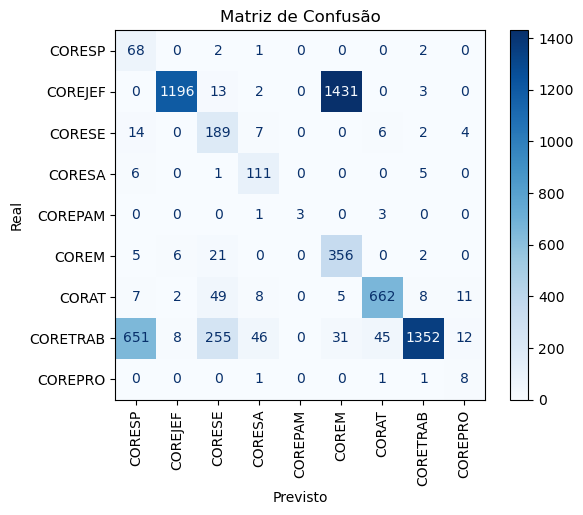

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
cm = confusion_matrix(y_test_encoded, model_naive_bayes.predict(X_test))

# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model_naive_bayes, X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")

# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()

In [48]:
!pip install -U imbalanced-learn


In [49]:
pip install --upgrade numpy


In [50]:
y_train_encoded = label_encoder.fit_transform(y_train)


In [51]:
X_train

,tipo_1/3 DE FÉRIAS,tipo_ABATIMENTO PROPORCIONAL DO PREÇO,tipo_ABONO DA LEI 8.178/91,tipo_ABONO DE PERMANÊNCIA,tipo_ABONO DE PERMANÊNCIA EM SERVIÇO (ART. 87),tipo_ABONO PECUNIÁRIO (ART. 78 LEI 8.112/1990),tipo_ACESSIBILIDADE,tipo_ACESSO SEM CONCLUSÃO DO ENSINO MÉDIO,tipo_ACESSÃO,tipo_ACIDENTE DE TRABALHO,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
13054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train.columns = X_train.columns.astype(str)


ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_encoded)

In [53]:

# Instancia o modelo Naive Bayes
model_naive_bayes_resampled = GaussianNB()

# Treina o modelo Naive Bayes
model_naive_bayes_resampled.fit(X_train_resampled, y_train_resampled)

y_test_encoded = label_encoder.transform(y_test)


# Avalia o modelo com model score
accuracymodelscore = model_naive_bayes_resampled.score(X_test, y_test_encoded)
print(f"Acurácia do modelo .score: {accuracymodelscore}")


# Realiza previsões no conjunto de treinamento
y_pred = model_naive_bayes_resampled.predict(X_test)

# Avalia o modelo Naive Bayes
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Acurácia do modelo Naive Bayes: {accuracy}")


Acurácia do modelo .score: 0.5988222859731239
Acurácia do modelo Naive Bayes: 0.5988222859731239


In [54]:
#medir a acurácia balanceada
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test_encoded, model_naive_bayes_resampled.predict(X_test)))


0.7410275007295304


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, model_naive_bayes_resampled.predict(X_test)))

              precision    recall  f1-score   support

           0       0.09      0.93      0.17        73
           1       0.99      0.46      0.62      2645
           2       0.36      0.85      0.50       222
           3       0.61      0.91      0.73       123
           4       1.00      0.43      0.60         7
           5       0.20      0.92      0.32       390
           6       0.93      0.88      0.90       752
           7       0.98      0.57      0.72      2400
           8       0.23      0.73      0.35        11

    accuracy                           0.60      6623
   macro avg       0.60      0.74      0.55      6623
weighted avg       0.89      0.60      0.67      6623



In [56]:
# Converte os resultados preditos de volta para os nomes originais
y_pred_original = label_encoder.inverse_transform(model_naive_bayes_resampled.predict(X_test))

# Imprime o relatório de classificação
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

       CORAT       0.09      0.93      0.17        73
     COREJEF       0.99      0.46      0.62      2645
       COREM       0.36      0.85      0.50       222
     COREPAM       0.61      0.91      0.73       123
     COREPRO       1.00      0.43      0.60         7
      CORESA       0.20      0.92      0.32       390
      CORESE       0.93      0.88      0.90       752
      CORESP       0.98      0.57      0.72      2400
    CORETRAB       0.23      0.73      0.35        11

    accuracy                           0.60      6623
   macro avg       0.60      0.74      0.55      6623
weighted avg       0.89      0.60      0.67      6623



<Figure size 1000x800 with 0 Axes>

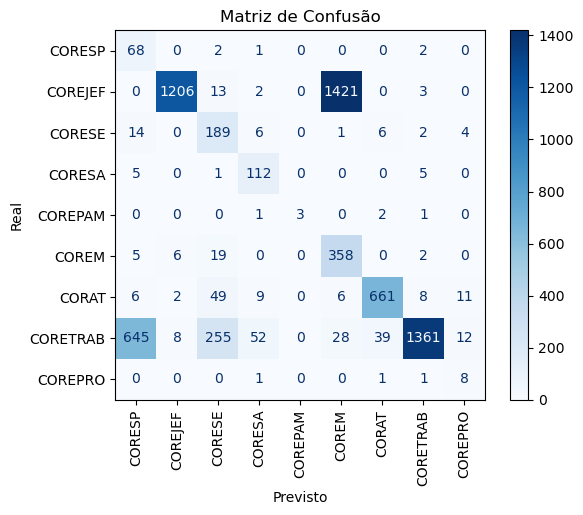

In [57]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test_encoded, model_naive_bayes_resampled.predict(X_test))

# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model_naive_bayes_resampled,X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")



# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()